In [21]:
import json

# Read the JSON file
with open('conversation_stats.json') as f:
    data = json.load(f)

# Initialize accumulators and containers for metrics
total_processing_sum = 0
tts_processing_sum = 0
stt_diarization_sum = 0
stt_characters_sum = 0
llm_ms_sum = 0
llm_token_count_sum = 0
tts_phoneme_length_sum = 0
similarity_values = []
unique_users_set = set()
count = 0

# Process each conversation log
for log in data:
    count += 1
    # Compute total processing as the sum of STT diarization, LLM, and TTS times
    computed_total_processing = (
        log.get('stt_diarization_ms', 0) +
        log.get('llm_ms', 0) +
        log.get('tts_ms', 0)
    )
    total_processing_sum += computed_total_processing
    
    tts_processing_sum += log.get('tts_ms', 0)
    stt_diarization_sum += log.get('stt_diarization_ms', 0)
    stt_characters_sum += log.get('stt_characters', 0)
    llm_ms_sum += log.get('llm_ms', 0)
    llm_token_count_sum += log.get('llm_token_count', 0)
    tts_phoneme_length_sum += len(log.get('tts_phonemes', ''))
    
    diarization = log.get('diarization', {})
    
    # Collect unique speakers from this log
    unique_speakers = diarization.get('unique_speakers', [])
    for speaker in unique_speakers:
        unique_users_set.add(speaker)
    
    # Collect similarity values from each segment
    segments = diarization.get('segments', [])
    for segment in segments:
        sim = segment.get('similarity')
        if sim is not None:
            similarity_values.append(sim)

# Compute averages
average_total_processing_ms = total_processing_sum / count if count else 0
average_tts_processing_ms = tts_processing_sum / count if count else 0
average_stt_diarization_ms = stt_diarization_sum / count if count else 0
average_stt_characters = stt_characters_sum / count if count else 0
average_llm_ms = llm_ms_sum / count if count else 0
average_llm_token_count = llm_token_count_sum / count if count else 0
average_tts_phoneme_length = tts_phoneme_length_sum / count if count else 0
average_similarity = sum(similarity_values) / len(similarity_values) if similarity_values else 0
total_unique_users = len(unique_users_set)
unique_users = list(unique_users_set)

# Create a metrics dictionary
metrics = {
    "average_total_processing_ms": average_total_processing_ms,
    "average_tts_processing_ms": average_tts_processing_ms,
    "unique_users": unique_users,
    "total_unique_users": total_unique_users,
    "average_similarity": average_similarity,
    "average_tts_phoneme_length": average_tts_phoneme_length,
    "additional_metrics": {
        "average_stt_diarization_ms": average_stt_diarization_ms,
        "average_stt_characters": average_stt_characters,
        "average_llm_ms": average_llm_ms,
        "average_llm_token_count": average_llm_token_count
    }
}

# Print the computed metrics in a pretty JSON format
print(json.dumps(metrics, indent=2))


{
  "average_total_processing_ms": 4431.378627393328,
  "average_tts_processing_ms": 138.72984224596368,
  "unique_users": [
    "Fallback",
    "Unknown",
    "Mirko",
    "Andrea",
    "Morko"
  ],
  "total_unique_users": 5,
  "average_similarity": 0.2603988003777587,
  "average_tts_phoneme_length": 213.92349726775956,
  "additional_metrics": {
    "average_stt_diarization_ms": 2763.3613710653485,
    "average_stt_characters": 106.92349726775956,
    "average_llm_ms": 1529.2874140820156,
    "average_llm_token_count": 52.377049180327866
  }
}


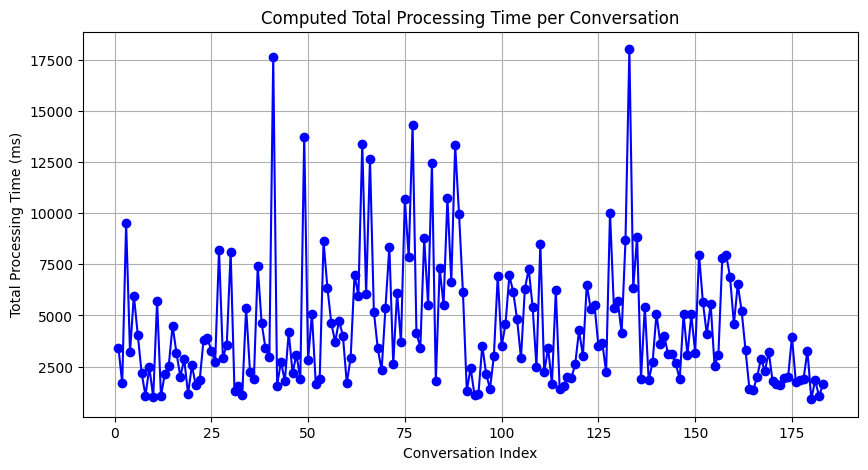

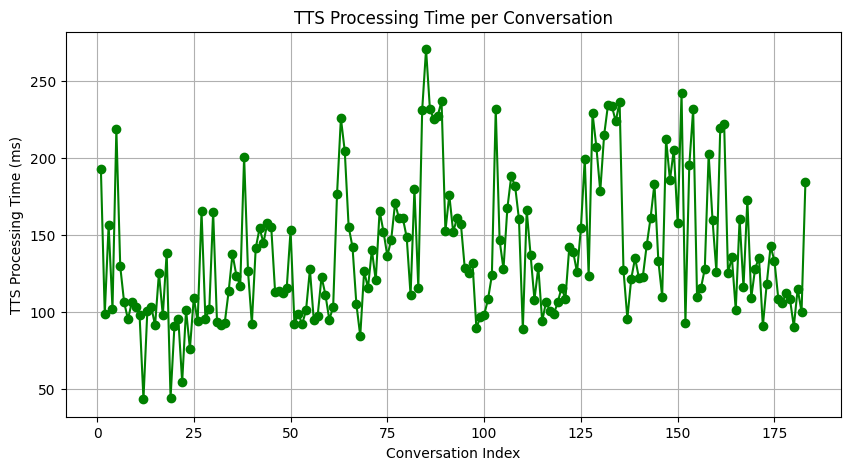

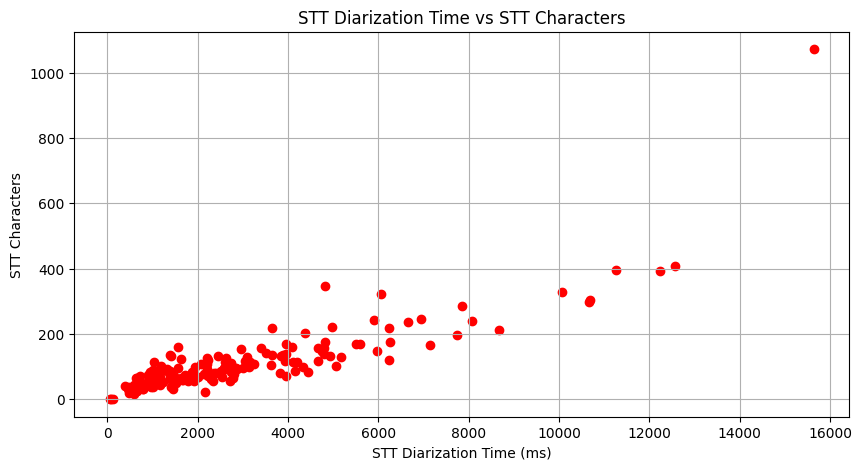

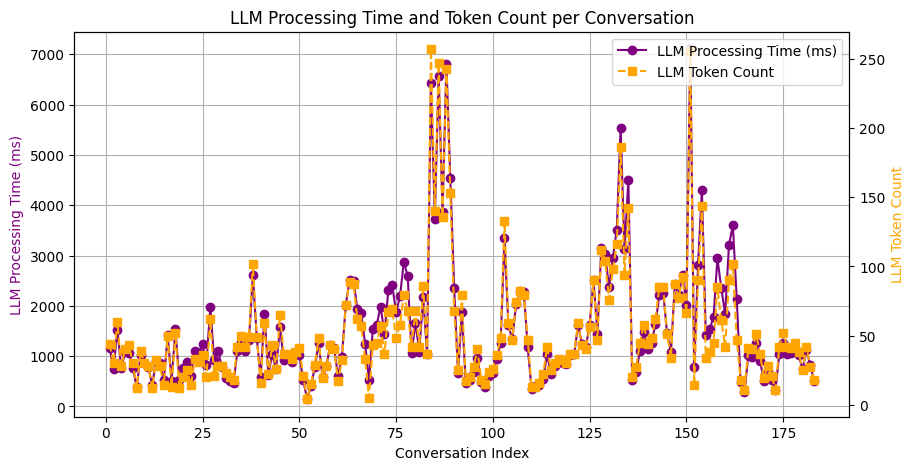

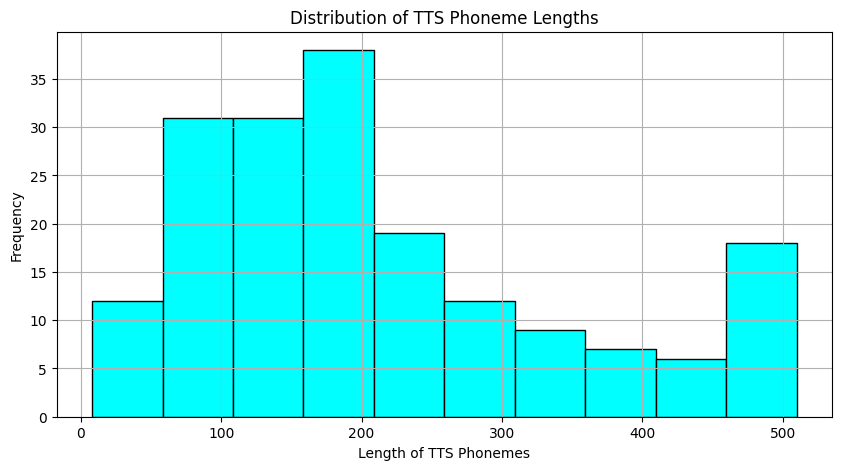

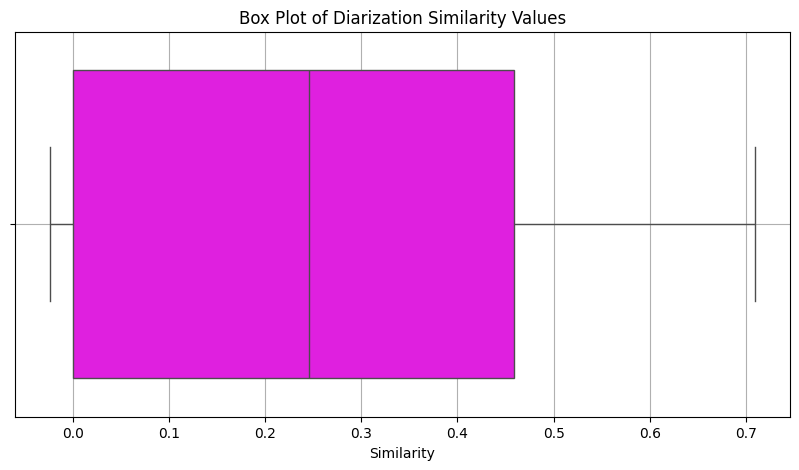

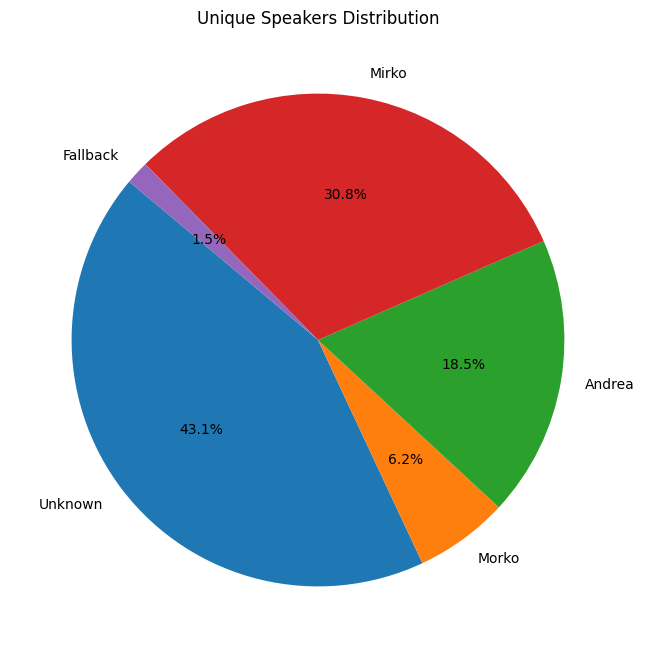

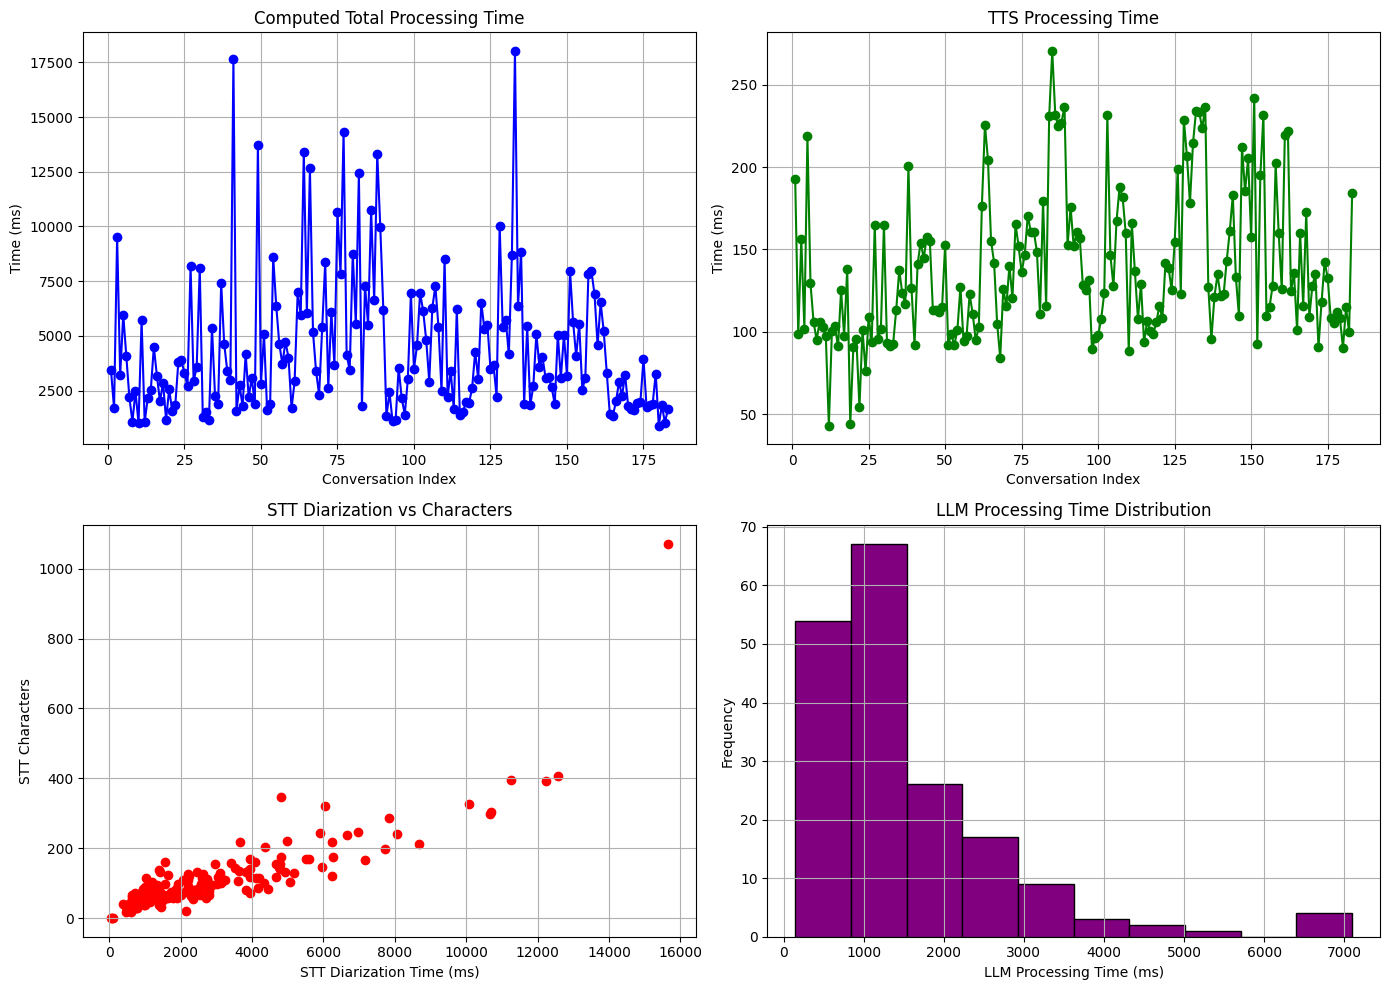

In [22]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Read the JSON file
with open('conversation_stats.json') as f:
    data = json.load(f)

# Initialize lists for storing metrics per conversation
indices = []
total_processing_times = []  # Will store computed total processing time
tts_processing_times = []
stt_diarization_times = []
stt_characters = []
llm_ms_list = []
llm_token_counts = []
tts_phoneme_lengths = []
similarity_values = []
speakers_list = []

# Process each conversation log
for idx, log in enumerate(data, start=1):
    indices.append(idx)
    
    # Compute total processing as the sum of STT diarization, LLM, and TTS processing times
    computed_total_processing = (
        log.get('stt_diarization_ms', 0) +
        log.get('llm_ms', 0) +
        log.get('tts_ms', 0)
    )
    total_processing_times.append(computed_total_processing)
    
    tts_processing_times.append(log.get('tts_ms', 0))
    stt_diarization_times.append(log.get('stt_diarization_ms', 0))
    stt_characters.append(log.get('stt_characters', 0))
    llm_ms_list.append(log.get('llm_ms', 0))
    llm_token_counts.append(log.get('llm_token_count', 0))
    tts_phoneme_lengths.append(len(log.get('tts_phonemes', '')))
    
    diarization = log.get('diarization', {})
    for segment in diarization.get('segments', []):
        sim = segment.get('similarity')
        if sim is not None:
            similarity_values.append(sim)
    speakers_list.extend(diarization.get('unique_speakers', []))

# -------------------------------------------------------------------
# Plot 1: Total Processing Time per Conversation (Computed)
plt.figure(figsize=(10, 5))
plt.plot(indices, total_processing_times, marker='o', linestyle='-', color='blue')
plt.title('Computed Total Processing Time per Conversation')
plt.xlabel('Conversation Index')
plt.ylabel('Total Processing Time (ms)')
plt.grid(True)
plt.show()

# -------------------------------------------------------------------
# Plot 2: TTS Processing Time per Conversation
plt.figure(figsize=(10, 5))
plt.plot(indices, tts_processing_times, marker='o', linestyle='-', color='green')
plt.title('TTS Processing Time per Conversation')
plt.xlabel('Conversation Index')
plt.ylabel('TTS Processing Time (ms)')
plt.grid(True)
plt.show()

# -------------------------------------------------------------------
# Plot 3: Scatter Plot of STT Diarization Time vs STT Characters
plt.figure(figsize=(10, 5))
plt.scatter(stt_diarization_times, stt_characters, color='red')
plt.title('STT Diarization Time vs STT Characters')
plt.xlabel('STT Diarization Time (ms)')
plt.ylabel('STT Characters')
plt.grid(True)
plt.show()

# -------------------------------------------------------------------
# Plot 4: LLM Processing Time and Token Count (Dual y-axis)
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(indices, llm_ms_list, marker='o', linestyle='-', color='purple', label='LLM Processing Time (ms)')
ax2.plot(indices, llm_token_counts, marker='s', linestyle='--', color='orange', label='LLM Token Count')
ax1.set_xlabel('Conversation Index')
ax1.set_ylabel('LLM Processing Time (ms)', color='purple')
ax2.set_ylabel('LLM Token Count', color='orange')
plt.title('LLM Processing Time and Token Count per Conversation')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
ax1.grid(True)
plt.show()

# -------------------------------------------------------------------
# Plot 5: Histogram of TTS Phoneme Lengths
plt.figure(figsize=(10, 5))
plt.hist(tts_phoneme_lengths, bins=10, color='cyan', edgecolor='black')
plt.title('Distribution of TTS Phoneme Lengths')
plt.xlabel('Length of TTS Phonemes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# -------------------------------------------------------------------
# Plot 6: Box Plot of Diarization Similarity Values using Seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(x=similarity_values, color='magenta')
plt.title('Box Plot of Diarization Similarity Values')
plt.xlabel('Similarity')
plt.grid(True)
plt.show()

# -------------------------------------------------------------------
# Plot 7: Pie Chart of Unique Speakers Distribution
speaker_counts = collections.Counter(speakers_list)
plt.figure(figsize=(8, 8))
plt.pie(speaker_counts.values(), labels=speaker_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Unique Speakers Distribution')
plt.show()

# -------------------------------------------------------------------
# Plot 8: Multi-Plot Dashboard (4 Plots in One Figure)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Top-left: Computed Total Processing Time
axs[0,0].plot(indices, total_processing_times, marker='o', color='blue')
axs[0,0].set_title('Computed Total Processing Time')
axs[0,0].set_xlabel('Conversation Index')
axs[0,0].set_ylabel('Time (ms)')
axs[0,0].grid(True)

# Top-right: TTS Processing Time
axs[0,1].plot(indices, tts_processing_times, marker='o', color='green')
axs[0,1].set_title('TTS Processing Time')
axs[0,1].set_xlabel('Conversation Index')
axs[0,1].set_ylabel('Time (ms)')
axs[0,1].grid(True)

# Bottom-left: STT Diarization vs STT Characters (Scatter)
axs[1,0].scatter(stt_diarization_times, stt_characters, color='red')
axs[1,0].set_title('STT Diarization vs Characters')
axs[1,0].set_xlabel('STT Diarization Time (ms)')
axs[1,0].set_ylabel('STT Characters')
axs[1,0].grid(True)

# Bottom-right: Histogram of LLM Processing Time
axs[1,1].hist(llm_ms_list, bins=10, color='purple', edgecolor='black')
axs[1,1].set_title('LLM Processing Time Distribution')
axs[1,1].set_xlabel('LLM Processing Time (ms)')
axs[1,1].set_ylabel('Frequency')
axs[1,1].grid(True)

plt.tight_layout()
plt.show()


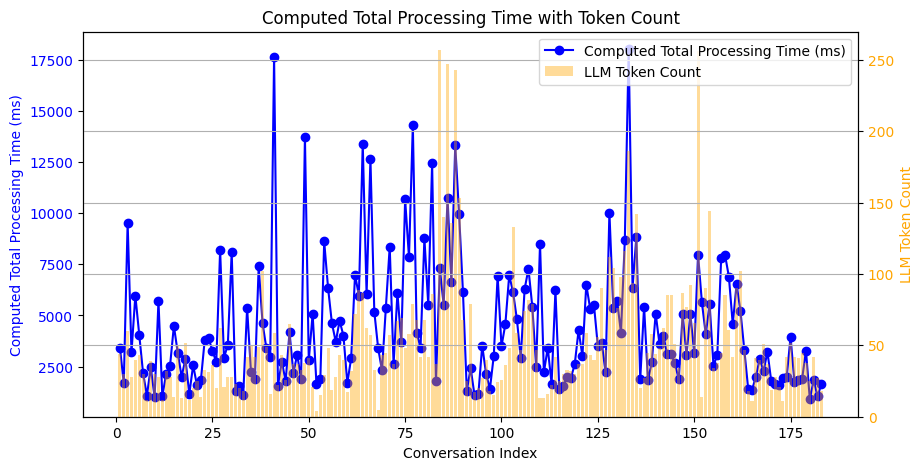

In [23]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open('conversation_stats.json') as f:
    data = json.load(f)

# Initialize lists to store conversation indices, computed total processing times, and token counts
indices = []
computed_total_processing_times = []
llm_token_counts = []

# Process each conversation log
for idx, log in enumerate(data, start=1):
    indices.append(idx)
    # Compute total processing time as sum of STT diarization, LLM, and TTS processing times
    computed_total = (
        log.get('stt_diarization_ms', 0) +
        log.get('llm_ms', 0) +
        log.get('tts_ms', 0)
    )
    computed_total_processing_times.append(computed_total)
    llm_token_counts.append(log.get('llm_token_count', 0))

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Plot computed total processing time on the left y-axis
ax1.plot(indices, computed_total_processing_times, marker='o', linestyle='-', color='blue', label='Computed Total Processing Time (ms)')
ax1.set_xlabel('Conversation Index')
ax1.set_ylabel('Computed Total Processing Time (ms)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot LLM token count on the right y-axis as bars
ax2.bar(indices, llm_token_counts, alpha=0.4, color='orange', label='LLM Token Count')
ax2.set_ylabel('LLM Token Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Computed Total Processing Time with Token Count')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.grid(True)
plt.show()


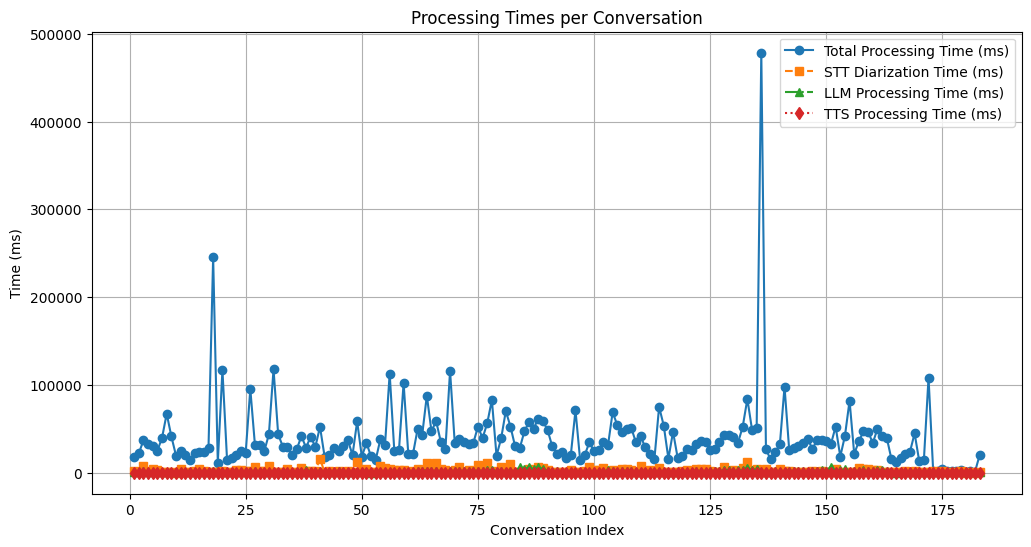

In [26]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open('conversation_stats.json') as f:
    data = json.load(f)

# Initialize lists for processing times
indices = []
total_processing_times = []
stt_diarization_times = []
llm_processing_times = []
tts_processing_times = []

# Extract data from each conversation log
for idx, log in enumerate(data, start=1):
    indices.append(idx)
    computed_total = log.get('stt_diarization_ms', 0) + log.get('llm_ms', 0) + log.get('tts_ms', 0)
    total_processing_times.append(computed_total)
    stt_diarization_times.append(log.get('stt_diarization_ms', 0))
    llm_processing_times.append(log.get('llm_ms', 0))
    tts_processing_times.append(log.get('tts_ms', 0))

# Create a multi-line plot for the processing times
plt.figure(figsize=(12, 6))
plt.plot(indices, total_processing_times, marker='o', linestyle='-', label='Total Processing Time (ms)')
plt.plot(indices, stt_diarization_times, marker='s', linestyle='--', label='STT Diarization Time (ms)')
plt.plot(indices, llm_processing_times, marker='^', linestyle='-.', label='LLM Processing Time (ms)')
plt.plot(indices, tts_processing_times, marker='d', linestyle=':', label='TTS Processing Time (ms)')

plt.title('Processing Times per Conversation')
plt.xlabel('Conversation Index')
plt.ylabel('Time (ms)')
plt.grid(True)
plt.legend()
plt.show()
